In [18]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from scipy.linalg import eigh_tridiagonal

# The Finite Square Well

<p align="center">
  <img src="../images/squarewellwhite.png" alt="drawing" width="500" align="center"/>
</p>

The Hamiltonian $H = -\frac{\hbar^2}{2m}\frac{d^2}{dx^2} + V(x)$ can first be be used to write the Schrodinger equation $H\psi = E\psi$ as 

$$\left(-\frac{\hbar^2}{2m}\frac{d^2}{dx^2} +V(x) \right)\psi(x) = E \psi(x)$$

We can rewrite this as

$$\left(-\frac{d^2}{dx'^2} +\frac{2ma^2}{\hbar^2}V(x') \right)\psi(x') = \frac{2ma^2}{\hbar^2}E \psi(x')$$

where $x'=x/a$. Now the well goes from -1 to 1 as opposed to $-a$ to $a$. We can then define $V'= \frac{2ma^2}{\hbar^2}V$ and $E'=\frac{2ma^2}{\hbar^2}E$ to make the problem simpler:

<span style="color: red;">
$$\boxed{\left(-\frac{d^2}{dx'^2} + V' \right)\psi(x') = E' \psi(x')}$$
</span>
    
But we still have that pesky $V_0$ to deal with. Noting that $V' = V/(\frac{\hbar^2}{2ma^2})$ we have that $V_0=-V_0' \cdot \frac{\hbar^2}{2ma^2}$ inside the well. ($V_0'$ is a dimensionless number that tells you how many $\frac{\hbar^2}{2ma^2}$s there are in $V_0$). 

In summary:

<span style="color: yellow;">

1. Determine $V'$ inside the well using $V_0' = V_0/(\frac{\hbar^2}{2ma^2})$
2. Solve the eigenvalue equation above for (dimensionless) energies $E'$; the energies are given by $E=\frac{\hbar^2}{2ma^2}E'$
3. The obtained eigenfunctions $\psi(x')$ (where $x'=x/a$ is dimenionless) can be used to find the true eigenfunctions using the scale transformation $\psi(ax') = \psi(x)$
    
</span>

**For notational simplification, we will now drop all the primes, but remember that the 3 steps above need to be followed.**

Suppose we only care about bound energies where $-V_0<E<0$. As such, for example, $\sqrt{-E}$ is real. 

<span style="color: red;"> **Inside**:</span> $\left(-\frac{d^2}{dx^2} -V_0 \right)\psi = E \psi \hspace{10mm} \implies \hspace{20mm}$ <span style="color: red;">$\boxed{\frac{d^2\psi}{dx^2} = -k^2 \psi} \hspace{10mm} \text{where} \hspace{10mm} k=\sqrt{E+V_0}$</span>

<span style="color: red;">**Outside**:</span> $\left(-\frac{d^2}{dx^2}\right)\psi = E \psi \hspace{10mm} \implies \hspace{20mm} $ <span style="color: red;">$\boxed{\frac{d^2\psi}{dx^2} = l^2 \psi} \hspace{10mm} \text{where} \hspace{10mm} l=\sqrt{-E}$ </span>

Since the Hamiltonian is symmetric in $x$, the solutions are either even functions or odd functions (this is a quantum fact that you can prove). The solutions are thus

$$\psi_{\text{even}}(x) = \begin{cases}Ae^{lx}&x<-1\\ D\cos(kx)&-1\leq x \leq 1\\ Ae^{-lx}&x>1  \end{cases}$$

$$\psi_{\text{odd}}(x) = \begin{cases}Ae^{lx}&x<-1\\ C\sin(kx)&-1\leq x \leq 1\\ Ae^{-lx}&x>1  \end{cases}$$

The boundary conditions are that $\psi$ and $d\psi/dx$ are continuous at the boundaries $-1$ and $1$.

**Even**: $D\cos(k) = Ae^{-l}$ and $-kD\sin(k) = -lAe^{-l}$. Dividing these yields $k\tan(k) = l$ and thus

<span style="color: red;">$$\boxed{\sqrt{E+V_0}\tan(\sqrt{E+V_0}) = \sqrt{-E}}$$</span>

**Odd**: $C\sin(k) = Ae^{-l}$ and $kC\cos(k) = -lAe^{-l}$. Dividing these yields $k\cot(k) = -l$ and thus

<span style="color: red;">$$\boxed{-\sqrt{E+V_0}\cot(\sqrt{E+V_0}) = \sqrt{-E}}$$</span>

# Computing Energies

Get value of $V_0$ and energies corresponding to bound states ($-V_0 \leq E \leq 0$). Note that $V_0=36$ means that the actual potential energy is 36 times $\hbar^2/(2ma^2)$


In [19]:
V0 = 36
E = np.linspace(-V0, 0, 100000)

Get the right hand side (RHS) and left hand sides of the two equations above

In [20]:
RHS = np.sqrt(-E)
LHS1 = np.sqrt(E+V0)*np.tan(np.sqrt(E+V0))
LHS2 = -np.sqrt(E+V0)/np.tan(np.sqrt(E+V0+1e-9))

Plot the curves. The energies correspond to the $x$ values where the red curve (RHS) intersects with the left hand sides of the two equations.

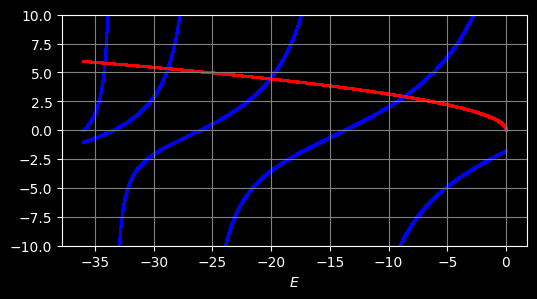

In [21]:
plt.figure(figsize=(6,3))
plt.scatter(E, LHS1, s=1, color='blue')
plt.scatter(E, LHS2, s=1, color='blue')
plt.scatter(E, RHS, s=1, color='red')
plt.ylim(-10,10)
plt.grid(color='grey')
plt.xlabel('$E$')
plt.show()

Thus we can see that there are 4 possible bound energy states in this finite square well. Lets solve for the intersection points of these curves. Below, `f1` corresponds to `RHS-LHS1` and `f2` corresponds to `RHS-LHS2`. The energies that make these expressions equal to zero correspond to the intersection points above. 

In [22]:
def f1(E, V0):
    return np.sqrt(E+V0)*np.tan(np.sqrt(E+V0)) - np.sqrt(-E)
def f2(E, V0, eps=1e-10):
    return np.sqrt(E+V0+eps)/np.tan(np.sqrt(E+V0+eps)) + np.sqrt(-E)

Plot `f1` and `f1` as a function of energy

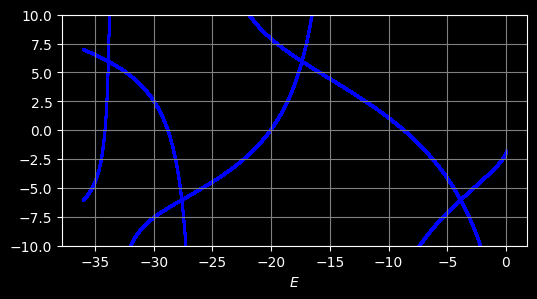

In [23]:
plt.figure(figsize=(6,3))
plt.scatter(E,f1(E,V0), s=1, color='blue')
plt.scatter(E,f2(E,V0), s=1, color='blue')
plt.grid(color='grey')
plt.ylim(-10,10)
plt.xlabel('$E$')
plt.show()

Now its set up so that the energies (x-values) corresponding to the locations where the clue curves above intersect $y=0$ are the bound energies of the system. The reason we do this is because the problem "Find $x$ so that $f(x)=0$" is how things are done on a computer. This is done below:

In [24]:
f1s = f1(E, V0)
f2s = f2(E, V0)

zero_crossings = np.where((np.abs(f1s)<3).astype(float)[:-1] * np.diff(np.sign(f1s)))[0]
(E[zero_crossings] + E[zero_crossings+1])/2

array([-34.19152192, -20.11322113])

In [25]:
zero_crossings_even = np.where(np.diff(np.sign(f1s)) * (np.abs(f1s[:-1])<3).astype(float))[0]
zero_crossings_odd = np.where(np.diff(np.sign(f2s)) * (np.abs(f2s[:-1])<3).astype(float))[0]
zero_crossings = np.sort(np.concatenate([zero_crossings_even, zero_crossings_odd]))
Es_method1 =  (E[zero_crossings] + E[zero_crossings+1])/2

In [26]:
Es_method1

array([-34.19152192, -28.82422824, -20.11322113,  -8.68922689])

So the first excited state, for example, is $E_1'=-28.82$. Following step 2 of the yellow list at the beginning of this document, the real energy is actually $E_1 = -28.82\frac{\hbar^2}{2ma^2}$

# Solving Numerically

The equation (primes ' not shown):

<!-- <span style="color: red;"> -->
$$\boxed{\left(-\frac{d^2}{dx^2} + V(x) \right)\psi(x) = E \psi(x)}$$
<!-- </span> -->
    
is an example of a eigenvalue problem over a continuous domain. By discretizing $x$ ($N$ equally spaced values $x$), we can turn this <span style="color: yellow;">differential operator</span> eigenvalue problem into a <span style="color: yellow;">matrix equation</span> eigenvalue problem over an $N$ dimensional vector space. If $x$ is made discrete then it can only take on values $x_i$ with spacing $\Delta x$. The corresponding values a function takes at these $x_i$ values is defined as $f_i\equiv f(x_i)$. In our case, we have $x_i$ values and $\psi_i$ values. Using the fact that

<br /><br />

$$\frac{d^2 \psi}{dx^2}(x_i) \approx \frac{-2\psi_i + \psi_{i-1}+\psi_{i+1}}{\Delta x^2}$$

we can rewrite the Schrodinger equation as

<!-- <span style="color: yellow;"> -->
$$\frac{2\psi_i - \psi_{i-1}-\psi_{i+1}}{\Delta x^2} + V_i \psi_i  = E \psi_i$$
<!-- </span> -->
    
Assuming the wave function decays sufficiently fast outside the well (will be discussed shortly), we can assume that <!-- <span style="color: yellow;"> -->$\psi_0=\psi_N=0$<!-- </span> --> are the boundary condtions.

Since this holds for all $\psi_i$, it can be expressed as a matrix eigenvalue equation (note, the top left and bottom right corners are okay since $\psi_0=0$ and $\psi_{N-1}=0$). Our Schrodinger equation $H\psi=E\psi$ then becomes the equation below. Note that the Hamiltonian is now a matrix.

<!-- <span style="color: red;"> -->
$$ \begin{bmatrix}\frac{2}{\Delta x^2}+V_1 & -\frac{1}{\Delta x^2} &   0 & 0...\\ -\frac{1}{\Delta x^2} & \frac{2}{\Delta x^2}+V_2 & -\frac{1}{\Delta x^2} & 0... \\ ...& ... & ... & -\frac{1}{ \Delta x^2}\\...0 & 0 & -\frac{1}{\Delta x^2} & \frac{2}{\Delta x^2}+V_{N-1} \\ \end{bmatrix} \begin{bmatrix} \psi_1 \\ \psi_2 \\ ... \\ \psi_{N-1} \end{bmatrix} = E \begin{bmatrix} \psi_1 \\ \psi_2 \\ ... \\ \psi_{N-1} \end{bmatrix} $$
<!-- </span> -->

Make 10000 values in $x$ that span from -3 to 3 (note that the well goes from -1 to 1)

In [27]:
N = 100000
x = np.linspace(-3,3,N)
dx = np.diff(x)[0]

Create the main diagonal and off diagonal of the tridiagonal matrix shown above.

In [28]:
main_diag = 2*np.ones(N)/dx**2 -V0*((x>=-1)*(x<=1)).astype(float)
off_diag =  -np.ones(N-1)/dx**2

Use the `eigh_tridiagonal` function from scipy to solve for the eigenvalues `Es` and eigenvectors `psis` of this matrix. Use the select_range option to only find eigenvalues in the given range (corresponding to bound states\)

In [29]:
Es_method2, psis = eigh_tridiagonal(main_diag, off_diag, select='v', select_range=(-V0,0))

Plot a sample eigenfunction:

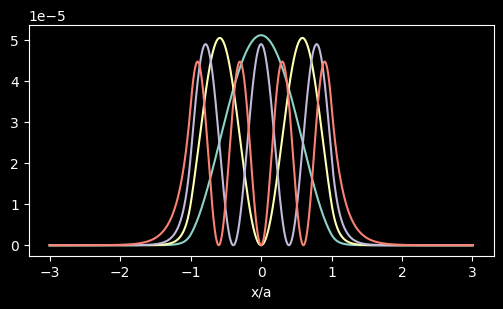

In [30]:
plt.figure(figsize=(6,3))
plt.plot(x, np.abs(psis.T[0])**2)
plt.plot(x, np.abs(psis.T[1])**2)
plt.plot(x, np.abs(psis.T[2])**2)
plt.plot(x, np.abs(psis.T[3])**2)
plt.xlabel('x/a')
plt.show()

In [31]:
Es_method2

array([-34.19173723, -28.82448397, -20.11396889,  -8.69047838])

Compute the relative errors (in %) between computing the eigenvalues using the two methods:

In [32]:
errs = 100 * np.abs(Es_method1 - Es_method2) / (0.5*(Es_method1 + Es_method2))
errs

array([-0.00062972, -0.00088719, -0.00371766, -0.01440168])